In [1]:
import os
import json
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#The Goal: 
# A supervised learning algorithm, such as a decision tree or support vector machine, 
# could be used to classify the genre of music based on the data provided. 
# The algorithm would be trained on a dataset of labeled music genres and the associated data values, 
# and then it could be used to predict the genre of music given a new set of data values.

cid ='d8762235995b4ddcbc0df90739df9a63' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = '887a4eccdbde4195bfc0f7f4c472fe70' # Client Secret; copy this from your app
username = '12155311349' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='https://localhost:8080/callback/'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username,scope,client_id=cid,client_secret=secret,redirect_uri="https://localhost:8080/callback/")

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)


In [3]:
rockPlaylistID ='https://open.spotify.com/playlist/37i9dQZF1DWXRqgorJj26U?si=b4fc7abf24d943b7' #Rock Playlist
countryPlaylistID = 'https://open.spotify.com/playlist/37i9dQZF1DWZBCPUIUs2iR?si=8aa077376b294156' 

rockPlaylist = sp.user_playlist(username, rockPlaylistID);
countryPlaylist = sp.user_playlist(username, countryPlaylistID);

rockTracks = rockPlaylist["tracks"];
rockSongs = rockTracks["items"];
countryTracks = countryPlaylist["tracks"];
countrySongs = countryTracks["items"];

#Remake Code into Functions! It will make this 10 times easier please

#Putting Track ID, Track Name, Album, and artist name in matrix's
#Rock Features
r_track_ids = [] 
r_track_names = []
r_album = []
r_artist =[]

#Country Features
c_track_ids = [] 
c_track_names = []
c_album = []
c_artist =[]

#Getting Rock Data
for i in range(0, len(rockSongs)):
    if rockSongs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        r_track_ids.append(rockSongs[i]['track']['id'])
        r_track_names.append(rockSongs[i]['track']['name'])
        r_album.append(rockSongs[i]['track']['album']['name'])
        r_artist.append(rockSongs[i]['track']['artists'][0]['name'])

r_features = []
for i in range(0,len(rockSongs)):
    r_audio_features = sp.audio_features(r_track_ids[i])
    for track in r_audio_features:
      
      if track is None:
        print(track)
        r_features.append({'danceability': 0, 'energy': 0, 'key': 0, 'loudness': 0, 'mode': 0, 'speechiness': 0, 'acousticness': 0, 'instrumentalness': 0, 'liveness': 0, 'valence': 0, 'tempo': 0, 'type': 'audio_features', 'id': '00000', 'uri': 'spotify:track:0', 'track_href': 'https://api.spotify.com/', 'analysis_url': 'https://api.spotify.com/', 'duration_ms': 0, 'time_signature': 0})
      else:
        r_features.append(track)

In [4]:
#Getting Country Data
for i in range(0, len(countrySongs)):
    if countrySongs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        c_track_ids.append(countrySongs[i]['track']['id'])
        c_track_names.append(countrySongs[i]['track']['name'])
        c_album.append(countrySongs[i]['track']['album']['name'])
        c_artist.append(countrySongs[i]['track']['artists'][0]['name'])

c_features = []
for i in range(0,len(countrySongs)):
    c_audio_features = sp.audio_features(c_track_ids[i])
    for track in c_audio_features:
      
      if track is None:
        print(track)
        c_features.append({'danceability': 0, 'energy': 0, 'key': 0, 'loudness': 0, 'mode': 0, 'speechiness': 0, 'acousticness': 0, 'instrumentalness': 0, 'liveness': 0, 'valence': 0, 'tempo': 0, 'type': 'audio_features', 'id': '00000', 'uri': 'spotify:track:0', 'track_href': 'https://api.spotify.com/', 'analysis_url': 'https://api.spotify.com/', 'duration_ms': 0, 'time_signature': 0})
      else:
        c_features.append(track)


In [5]:
#Popular Music counrty, rock,pop, R&B, hip-hop, and classical

#Creating our DataFrames
c_df = pd.DataFrame(c_features, index = c_track_names) #Country
r_df = pd.DataFrame(r_features, index = r_track_names) #Rock

#Adding a new column
c_df['genre'] = 0 #Country
r_df['genre'] = 1 #Rock
c_df['Song Title'] = c_track_names
r_df['Song Title'] = r_track_names
c_df['Artist'] = c_artist
r_df['Artist'] = r_artist

#Useful for Displaying the Data
rock_matrix = r_df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','genre',]]
country_matrix = c_df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','genre',]]

In [6]:
country_matrix.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
You Look So Good In Love,0.642,0.233,9,-16.568,1,0.0298,0.4350,0.000000,0.1050,0.333,114.495,0
Two Dozen Roses,0.695,0.502,4,-12.010,1,0.0279,0.3270,0.000000,0.0970,0.543,117.083,0
Check Yes Or No,0.708,0.524,5,-12.644,1,0.0352,0.0551,0.000003,0.0371,0.690,111.482,0
Whiskey Glasses,0.614,0.680,6,-4.580,1,0.0289,0.3690,0.000002,0.1150,0.707,149.959,0
The Gambler,0.671,0.501,4,-13.119,1,0.0594,0.3420,0.000000,0.1940,0.860,87.040,0


In [7]:
rock_matrix.head()

#playlist_matrix for the whole table

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
Over the Hills and Far Away - Remaster,0.402,0.691,7,-10.274,1,0.0691,0.06790,0.133000,0.0955,0.206,96.950,1
Seven Nation Army,0.743,0.446,4,-7.807,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,1
The Chain - 2004 Remaster,0.545,0.670,9,-8.810,1,0.0496,0.00900,0.000822,0.0451,0.481,151.553,1
Hotel California - 2013 Remaster,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,1
Another One Bites The Dust - Remastered 2011,0.933,0.528,5,-6.472,0,0.1620,0.11200,0.329000,0.1630,0.756,109.975,1


In [8]:
#Checking the Rock Data
rock_matrix.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,0.540930,0.740600,5.340000,-7.846270,0.770000,0.062402,0.129916,0.056157,0.176222,0.591060,124.833830,1.0
std,0.138606,0.169455,3.414822,2.810143,0.422953,0.056547,0.164956,0.134900,0.118285,0.216911,22.988906,0.0
min,0.249000,0.366000,0.000000,-18.064000,0.000000,0.024900,0.000018,0.000000,0.024400,0.104000,78.031000,1.0
25%,0.451250,0.630000,2.000000,-9.377500,1.000000,0.033300,0.003802,0.000031,0.086900,0.438750,112.731000,1.0
50%,0.539000,0.748000,5.000000,-7.567500,1.000000,0.044600,0.061050,0.000734,0.138500,0.606000,124.374000,1.0
75%,0.643500,0.901250,9.000000,-5.690750,1.000000,0.069525,0.202250,0.020800,0.268250,0.765000,137.458500,1.0
max,0.933000,0.987000,11.000000,-2.788000,1.000000,0.405000,0.619000,0.836000,0.659000,0.964000,195.815000,1.0


In [9]:
#Checking the Country Data
country_matrix.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,0.595270,0.521638,5.230000,-9.661150,0.970000,0.037335,0.414205,0.003719,0.160291,0.597130,120.394910,0.0
std,0.119342,0.196690,3.299388,3.698335,0.171447,0.013821,0.262583,0.018833,0.120543,0.203256,30.379754,0.0
min,0.259000,0.056800,0.000000,-20.508000,0.000000,0.024300,0.004810,0.000000,0.035100,0.137000,70.554000,0.0
25%,0.516250,0.400000,2.750000,-12.601250,1.000000,0.029650,0.219000,0.000000,0.087125,0.454250,95.433250,0.0
50%,0.604000,0.506000,5.000000,-9.261500,1.000000,0.032300,0.383000,0.000002,0.115500,0.637000,116.854500,0.0
75%,0.681500,0.668250,7.250000,-6.781500,1.000000,0.039025,0.641000,0.000329,0.203500,0.731000,137.030750,0.0
max,0.901000,0.948000,11.000000,-3.318000,1.000000,0.103000,0.960000,0.156000,0.893000,0.962000,204.016000,0.0


In [10]:
full_data = pd.concat([c_df, r_df[:1861]], ignore_index = True)

# Scale between 0 and 1
full_data["key"] = (full_data["key"] / full_data["key"].max())
full_data["tempo"] = (full_data["tempo"] / full_data["tempo"].max())
full_data["loudness"] = (full_data["loudness"] / full_data["loudness"].min())

full_data_random = full_data.sample(frac=1)
# full_data_random

#Just getting the numerical values, so no ID's, Artists, ect...
num_data_random = full_data_random[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','genre',]]
num_data_random

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
66,0.373,0.562,0.181818,0.626146,1,0.0323,0.216000,0.103000,0.3700,0.708,0.505397,0
134,0.730,0.487,0.363636,0.535937,1,0.0303,0.258000,0.010000,0.0852,0.731,0.563510,1
26,0.607,0.815,0.363636,0.322752,1,0.0390,0.047100,0.000028,0.1110,0.570,0.671266,0
156,0.412,0.658,0.363636,0.587624,0,0.0708,0.000045,0.000774,0.1760,0.454,0.799305,1
6,0.684,0.450,0.636364,0.508192,1,0.0332,0.704000,0.001910,0.2430,0.639,0.504382,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33,0.467,0.622,0.545455,0.353764,1,0.0310,0.365000,0.005270,0.0982,0.455,0.805907,0
171,0.741,0.697,0.000000,0.342696,1,0.0277,0.066400,0.000023,0.1330,0.774,0.569117,1
34,0.600,0.560,0.727273,0.307734,1,0.0325,0.479000,0.000000,0.1110,0.417,0.683618,0
114,0.412,0.902,0.818182,0.565633,1,0.4050,0.048400,0.131000,0.4050,0.422,0.439867,1


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

# Split the data into features (X) and target (y)
X = num_data_random.drop('genre', axis=1)
y = num_data_random['genre']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#Fitting and Evaluating the Model 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


In [30]:
k_values = [i for i in range (1,100)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

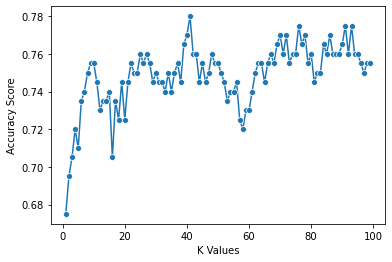

In [31]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [32]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=41)

In [33]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.6666666666666666


In [34]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [35]:
#Printing out our y_test
predicted = []
for i in range(0, len(y_test)):
    f=full_data.loc[y_test.index.values[i],:] 
    predicted.append(f)

predicted = pd.DataFrame(predicted) 
predicted[['Artist','Song Title','genre',]]

,Artist,Song Title,genre
148,R.E.M.,Losing My Religion,1
117,David Bowie,Rebel Rebel - 2016 Remaster,1
32,Deana Carter,Strawberry Wine,0
36,Faron Young,Country Girl,0
196,Black Sabbath,Iron Man - 2012 - Remaster,1
78,Conway Twitty,You've Never Been This Far Before - Re-Recorde...,0
45,Tim McGraw,Just To See You Smile,0
63,Tim McGraw,Live Like You Were Dying,0
105,Billy Idol,White Wedding - Pt. 1,1
20,Keith Urban,Blue Ain't Your Color,0


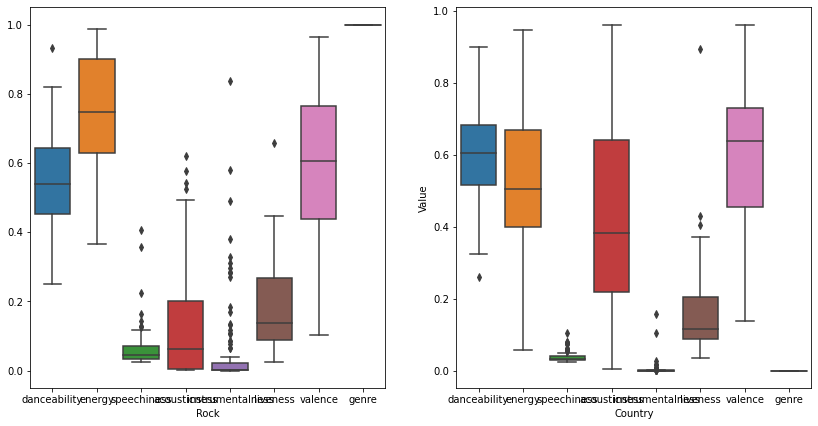

In [36]:
# BOXPLOTS of other data

r_box = rock_matrix.drop(columns = ['tempo','key','loudness','mode'])
c_box = country_matrix.drop(columns = ['tempo','key','loudness','mode'])
import matplotlib.pyplot as plt
import seaborn as sns 
fig, ax = plt.subplots(1,2,figsize=(14,7))
sns.boxplot(data = r_box,ax=ax[0])
sns.boxplot(data = c_box,ax=ax[1])
ax[0].set_xlabel('Rock')
ax[1].set_xlabel('Country')
plt.ylabel('Value')
plt.show()

In [37]:
f=full_data.loc[1:1, full_data.columns] 


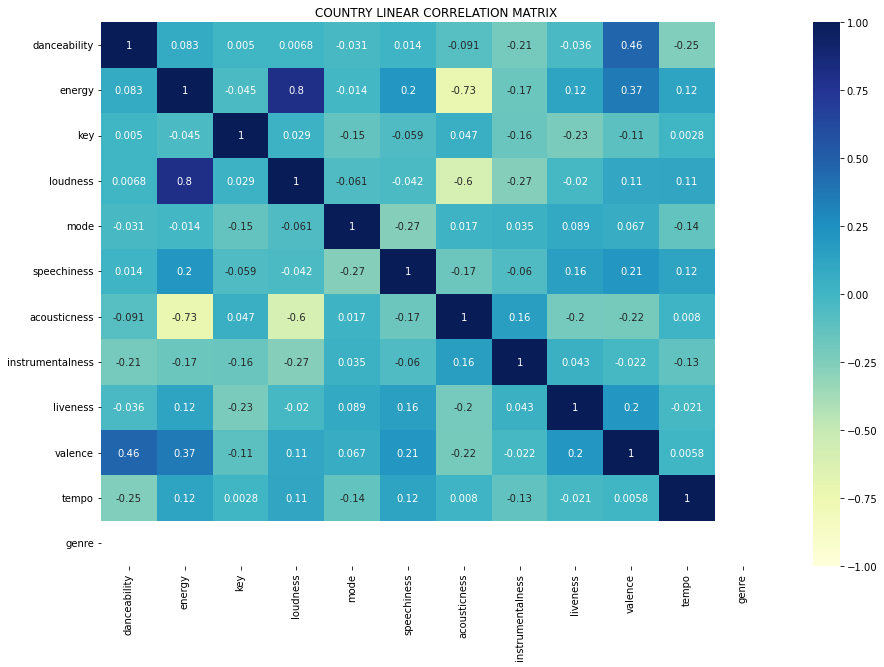

In [38]:
# Plot linear correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(country_matrix.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('COUNTRY LINEAR CORRELATION MATRIX')
plt.show()

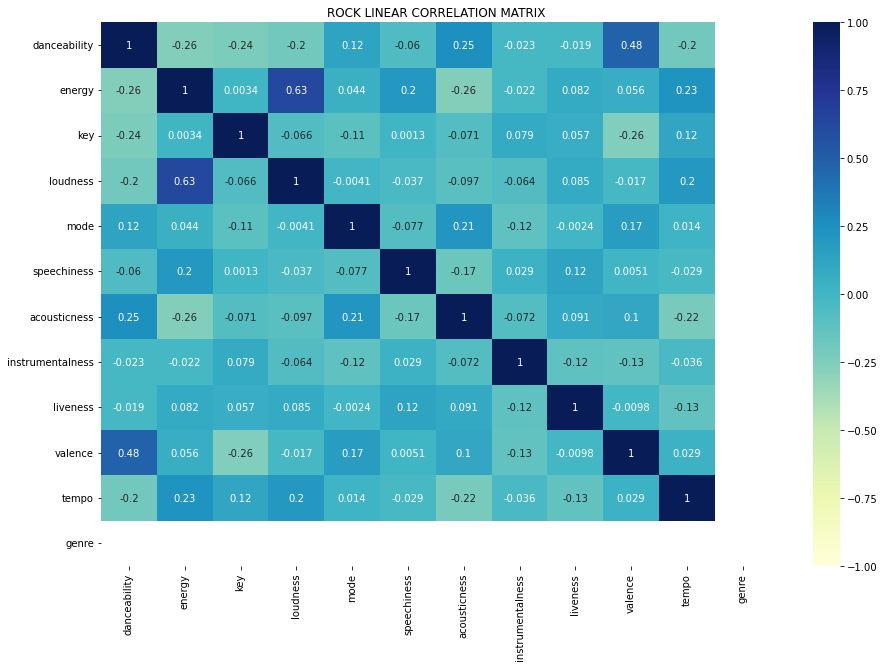

In [39]:
# Plot linear correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(rock_matrix.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('ROCK LINEAR CORRELATION MATRIX')
plt.show()